In [189]:
import pandas as pd
import numpy as np

data = pd.read_csv("data_superstar_v1_0_orig_5y.csv", delimiter=",")
data['date'] = pd.to_datetime(data['release_date'])
data.sort_values(by="date", inplace=True)

split_day = data["date"].iloc[-1] - pd.DateOffset(years=1)
data_train = data[(data["date"] < split_day)].copy()

In [190]:
columns = ["hit", "pagerank_x", "pagerank_y", "success_rate_x", "success_rate_y", "hits_in_past_x", "hits_in_past_y", "superstar_v5_x", "superstar_v5_y"]
#columns = ["degree_x", "weighted degree_x", "eccentricity_x", "closnesscentrality_x", "clustering_x", "betweenesscentrality_x", "eigencentrality_x","degree_y", "weighted degree_y", "eccentricity_y", "closnesscentrality_y", "clustering_y", "betweenesscentrality_y", "eigencentrality_y", "hit"]

Correlation Matrix:
                     hit  pagerank_x  pagerank_y  success_rate_x  \
hit             1.000000   -0.015127    0.010404        0.124704   
pagerank_x     -0.015127    1.000000    0.067659        0.002883   
pagerank_y      0.010404    0.067659    1.000000        0.031257   
success_rate_x  0.124704    0.002883    0.031257        1.000000   
success_rate_y  0.027986    0.032576    0.131096        0.065799   
hits_in_past_x  0.091413    0.042160    0.039799        0.589541   
hits_in_past_y  0.026983    0.048688    0.200773        0.062093   
superstar_v5_x -0.076005   -0.067964   -0.055625       -0.601332   
superstar_v5_y -0.026511   -0.072355   -0.313875       -0.087513   

                success_rate_y  hits_in_past_x  hits_in_past_y  \
hit                   0.027986        0.091413        0.026983   
pagerank_x            0.032576        0.042160        0.048688   
pagerank_y            0.131096        0.039799        0.200773   
success_rate_x        0.065799     

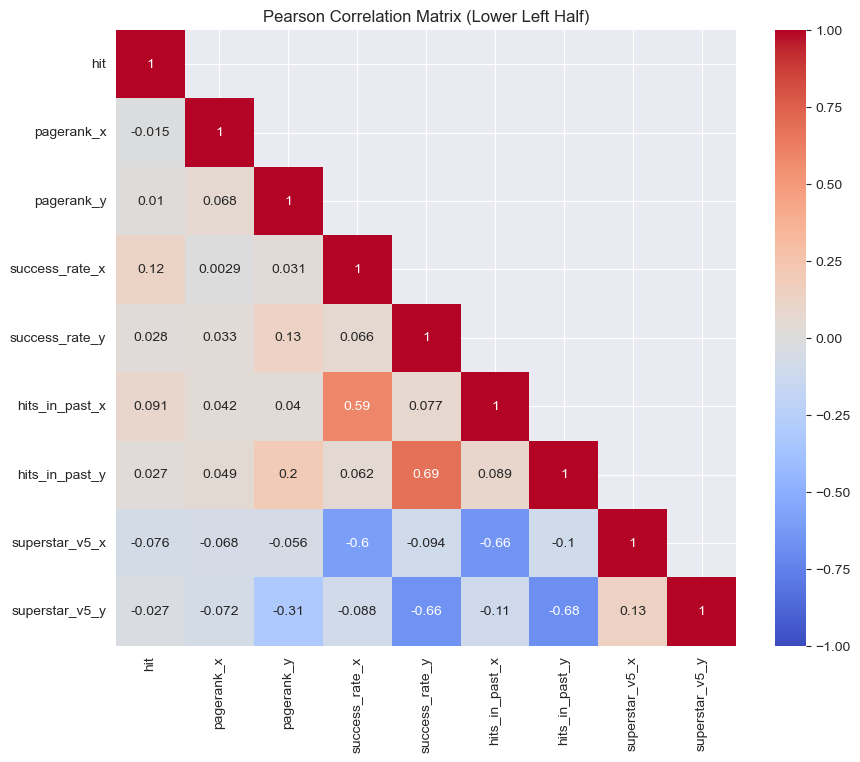

In [191]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assume `data` is your DataFrame and `columns` is the list of columns you want to consider
correlation_matrix = data_train[columns].corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
identity_matrix = np.identity(mask.shape[0])
real_mask = mask-identity_matrix
real_mask = real_mask.astype(dtype=bool)

# Plot the correlation matrix with the mask
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, mask=real_mask, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Pearson Correlation Matrix (Lower Left Half)')
plt.show()

Correlation Matrix:
                     hit  pagerank_x  pagerank_y  success_rate_x  \
hit             1.000000   -0.004840    0.015052        0.069653   
pagerank_x     -0.004840    1.000000    0.192827        0.213738   
pagerank_y      0.015052    0.192827    1.000000        0.092149   
success_rate_x  0.069653    0.213738    0.092149        1.000000   
success_rate_y  0.024482    0.085344    0.332692        0.132087   
hits_in_past_x  0.068169    0.215409    0.089223        0.998400   
hits_in_past_y  0.024498    0.085428    0.332720        0.132149   
superstar_v5_x -0.068748   -0.214687   -0.090465       -0.998716   
superstar_v5_y -0.024492   -0.085420   -0.332717       -0.132147   

                success_rate_y  hits_in_past_x  hits_in_past_y  \
hit                   0.024482        0.068169        0.024498   
pagerank_x            0.085344        0.215409        0.085428   
pagerank_y            0.332692        0.089223        0.332720   
success_rate_x        0.132087     

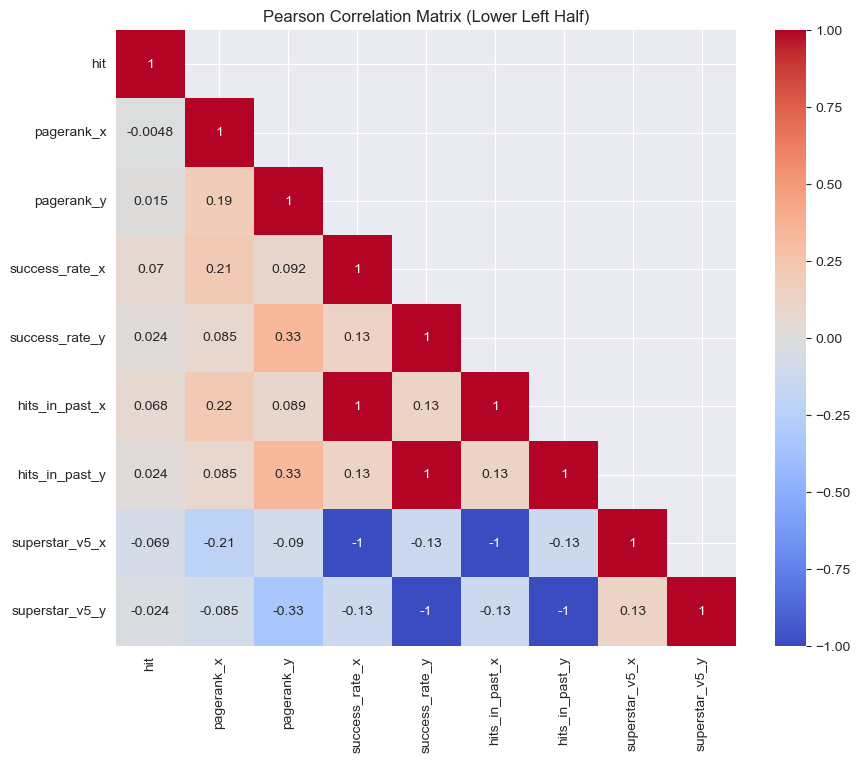

In [192]:
correlation_matrix = data_train[columns].corr(method="spearman")

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
identity_matrix = np.identity(mask.shape[0])
real_mask = mask-identity_matrix
real_mask = real_mask.astype(dtype=bool)

# Plot the correlation matrix with the mask
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, mask=real_mask, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Pearson Correlation Matrix (Lower Left Half)')
plt.show()

why is pagerank_x negatively correlated???
maybe because less successfullartists with hit artist coop?

In [193]:
df_one_hot = pd.get_dummies(data_train, columns=['Cluster_x', "Cluster_y"], drop_first=True)
df_one_hot

,song_id,song_name,song_popularity,explicit,song_type,track_number,num_artists,num_available_markets,release_date,duration_ms,...,Cluster_x_2.0,Cluster_x_3.0,Cluster_x_4.0,Cluster_x_5.0,Cluster_y_0.0,Cluster_y_1.0,Cluster_y_2.0,Cluster_y_3.0,Cluster_y_4.0,Cluster_y_5.0
0,3rTIDlmlGskGnRRqmRtvYn,Lone Stranger,0.0,False,Solo,19.0,1.0,74.0,2013-08-26,163255.0,...,True,False,False,False,False,False,False,False,False,False
64,7fq0d4gJ0MizFcdK7zhddn,Goodbye Lovers and Friends,33.0,False,Solo,10.0,1.0,77.0,2013-08-26,195707.0,...,False,False,False,False,False,False,False,False,False,False
63,6NlE71TbUglmKQVLhE1H8R,Evil Eye,52.0,True,Solo,2.0,1.0,77.0,2013-08-26,167253.0,...,False,False,False,False,False,False,False,False,False,False
62,7mexukWpLrCVwAztkM8kQl,Stand On the Horizon,46.0,False,Solo,4.0,1.0,77.0,2013-08-26,263120.0,...,False,False,False,False,False,False,False,False,False,False
61,6hADH7b57N5666cGv624vg,Right Action,44.0,False,Solo,1.0,1.0,77.0,2013-08-26,182280.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302833,4BLEnHP1FInl1u3xAbgI4n,Lullaby,65.0,False,Collaboration,15.0,2.0,75.0,2018-08-25,160184.0,...,False,False,False,False,False,True,False,False,False,False
302834,4p7fb6fjHMcyEebumewT2p,Back to You,34.0,False,Collaboration,13.0,2.0,75.0,2018-08-25,200323.0,...,False,False,False,False,False,True,False,False,False,False
302835,67ERfxHkUp2TPlVU9dAjox,Whiplash,38.0,False,Collaboration,10.0,2.0,75.0,2018-08-25,183913.0,...,False,False,False,False,False,True,False,False,False,False
302836,0FkqXwZLBMFH9VWhJTtlJo,Incy Wincy Spider,0.0,False,Solo,17.0,1.0,79.0,2018-08-25,95930.0,...,True,False,False,False,False,False,False,False,False,False


In [194]:
one_hot_columns = [col for col in df_one_hot.columns if col not in data_train.columns]

In [195]:
columns.extend(one_hot_columns)
columns

['hit',
 'pagerank_x',
 'pagerank_y',
 'success_rate_x',
 'success_rate_y',
 'hits_in_past_x',
 'hits_in_past_y',
 'superstar_v5_x',
 'superstar_v5_y',
 'Cluster_x_0.0',
 'Cluster_x_1.0',
 'Cluster_x_2.0',
 'Cluster_x_3.0',
 'Cluster_x_4.0',
 'Cluster_x_5.0',
 'Cluster_y_0.0',
 'Cluster_y_1.0',
 'Cluster_y_2.0',
 'Cluster_y_3.0',
 'Cluster_y_4.0',
 'Cluster_y_5.0']

Correlation Matrix:
                     hit  pagerank_x  pagerank_y  success_rate_x  \
hit             1.000000   -0.015127    0.010404        0.124704   
pagerank_x     -0.015127    1.000000    0.067659        0.002883   
pagerank_y      0.010404    0.067659    1.000000        0.031257   
success_rate_x  0.124704    0.002883    0.031257        1.000000   
success_rate_y  0.027986    0.032576    0.131096        0.065799   
hits_in_past_x  0.091413    0.042160    0.039799        0.589541   
hits_in_past_y  0.026983    0.048688    0.200773        0.062093   
superstar_v5_x -0.076005   -0.067964   -0.055625       -0.601332   
superstar_v5_y -0.026511   -0.072355   -0.313875       -0.087513   
Cluster_x_0.0  -0.002943   -0.043124    0.109190       -0.013502   
Cluster_x_1.0   0.031683    0.293543    0.148862        0.212136   
Cluster_x_2.0   0.004779   -0.353500   -0.118326       -0.125650   
Cluster_x_3.0  -0.015199   -0.081088   -0.026788       -0.037209   
Cluster_x_4.0  -0.035252    

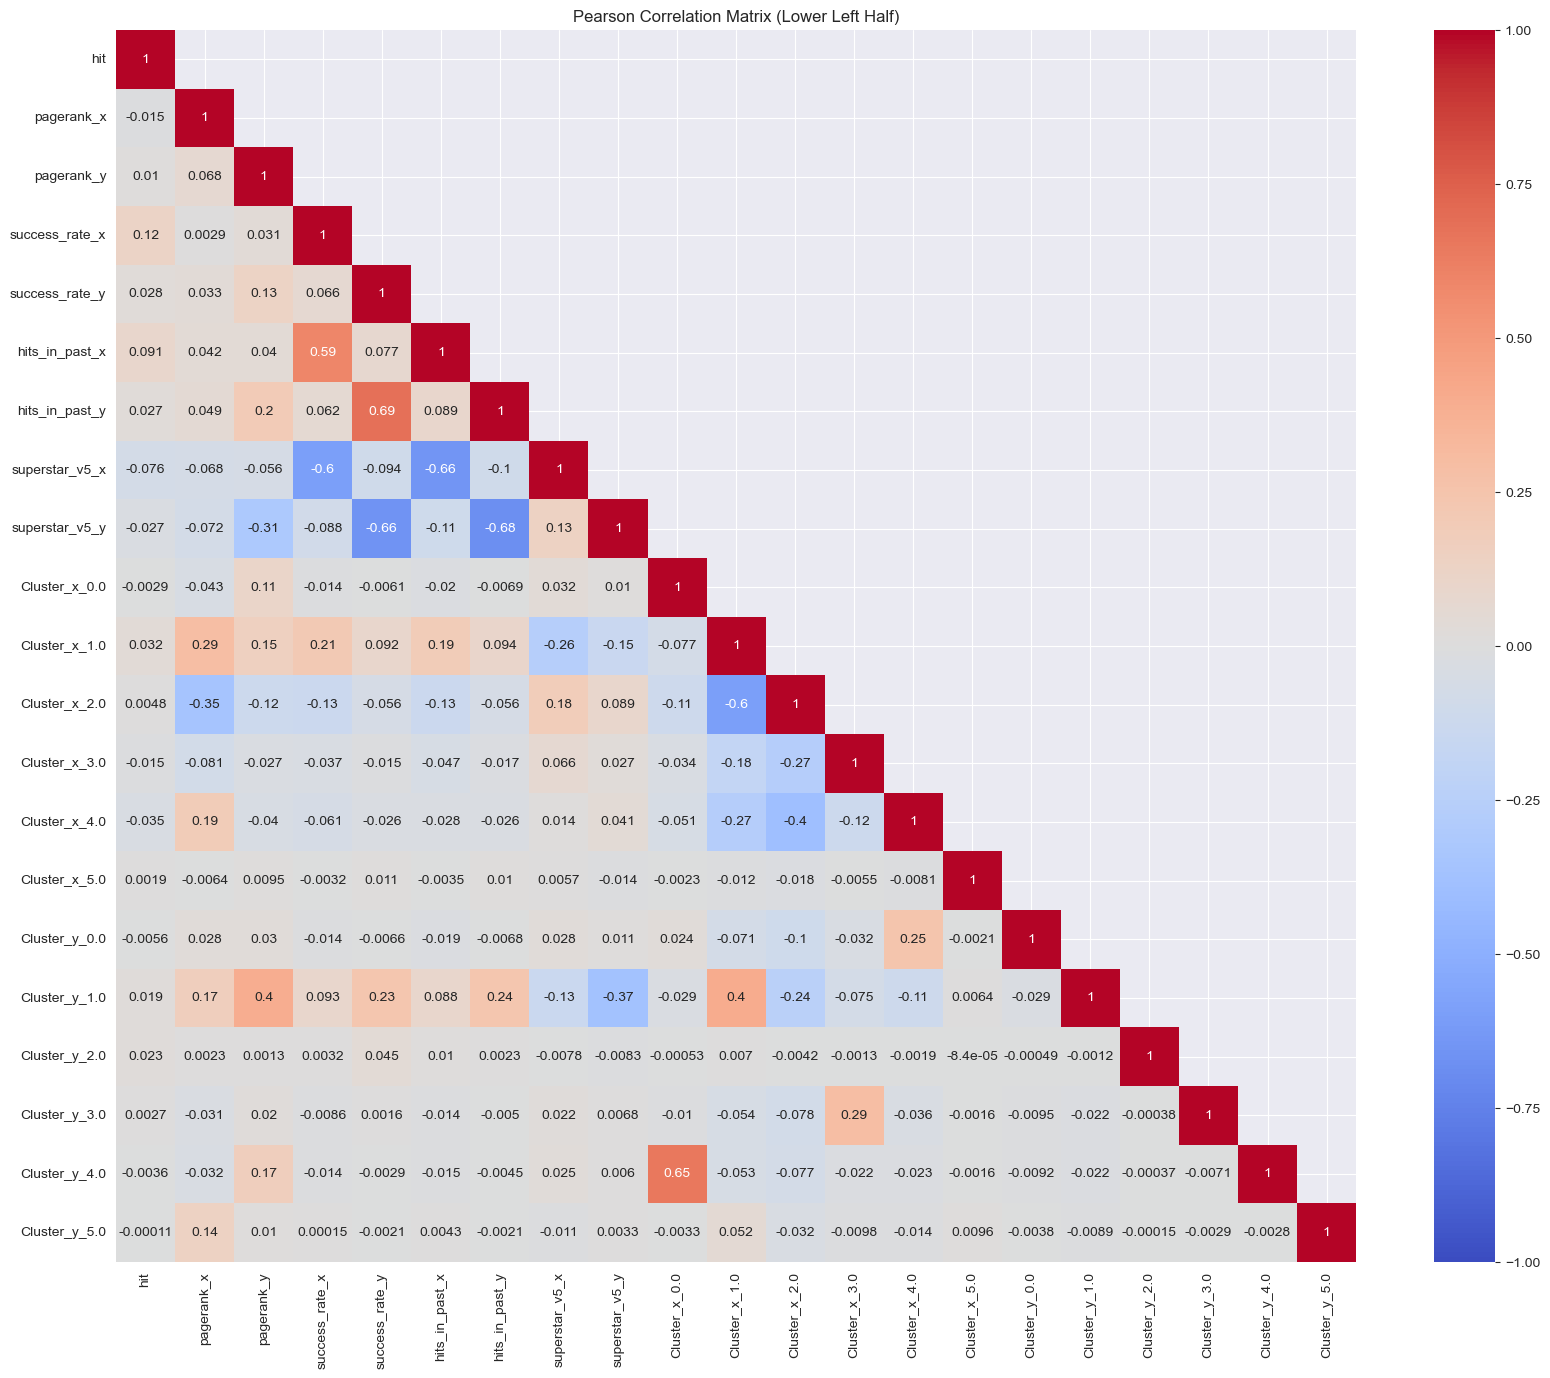

In [196]:
# Assume `data` is your DataFrame and `columns` is the list of columns you want to consider
correlation_matrix = df_one_hot[columns].corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
identity_matrix = np.identity(mask.shape[0])
real_mask = mask-identity_matrix
real_mask = real_mask.astype(dtype=bool)

# Plot the correlation matrix with the mask
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, mask=real_mask, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Pearson Correlation Matrix (Lower Left Half)')
plt.show()

Correlation Matrix:
                     hit  pagerank_x  pagerank_y  success_rate_x  \
hit             1.000000   -0.004840    0.015052        0.069653   
pagerank_x     -0.004840    1.000000    0.192827        0.213738   
pagerank_y      0.015052    0.192827    1.000000        0.092149   
success_rate_x  0.069653    0.213738    0.092149        1.000000   
success_rate_y  0.024482    0.085344    0.332692        0.132087   
hits_in_past_x  0.068169    0.215409    0.089223        0.998400   
hits_in_past_y  0.024498    0.085428    0.332720        0.132149   
superstar_v5_x -0.068748   -0.214687   -0.090465       -0.998716   
superstar_v5_y -0.024492   -0.085420   -0.332717       -0.132147   
Cluster_x_0.0  -0.002943   -0.085731    0.175943       -0.033710   
Cluster_x_1.0   0.031683    0.528742    0.291961        0.258821   
Cluster_x_2.0   0.004779   -0.834336   -0.293325       -0.185058   
Cluster_x_3.0  -0.015199    0.073840    0.002214       -0.063382   
Cluster_x_4.0  -0.035252    

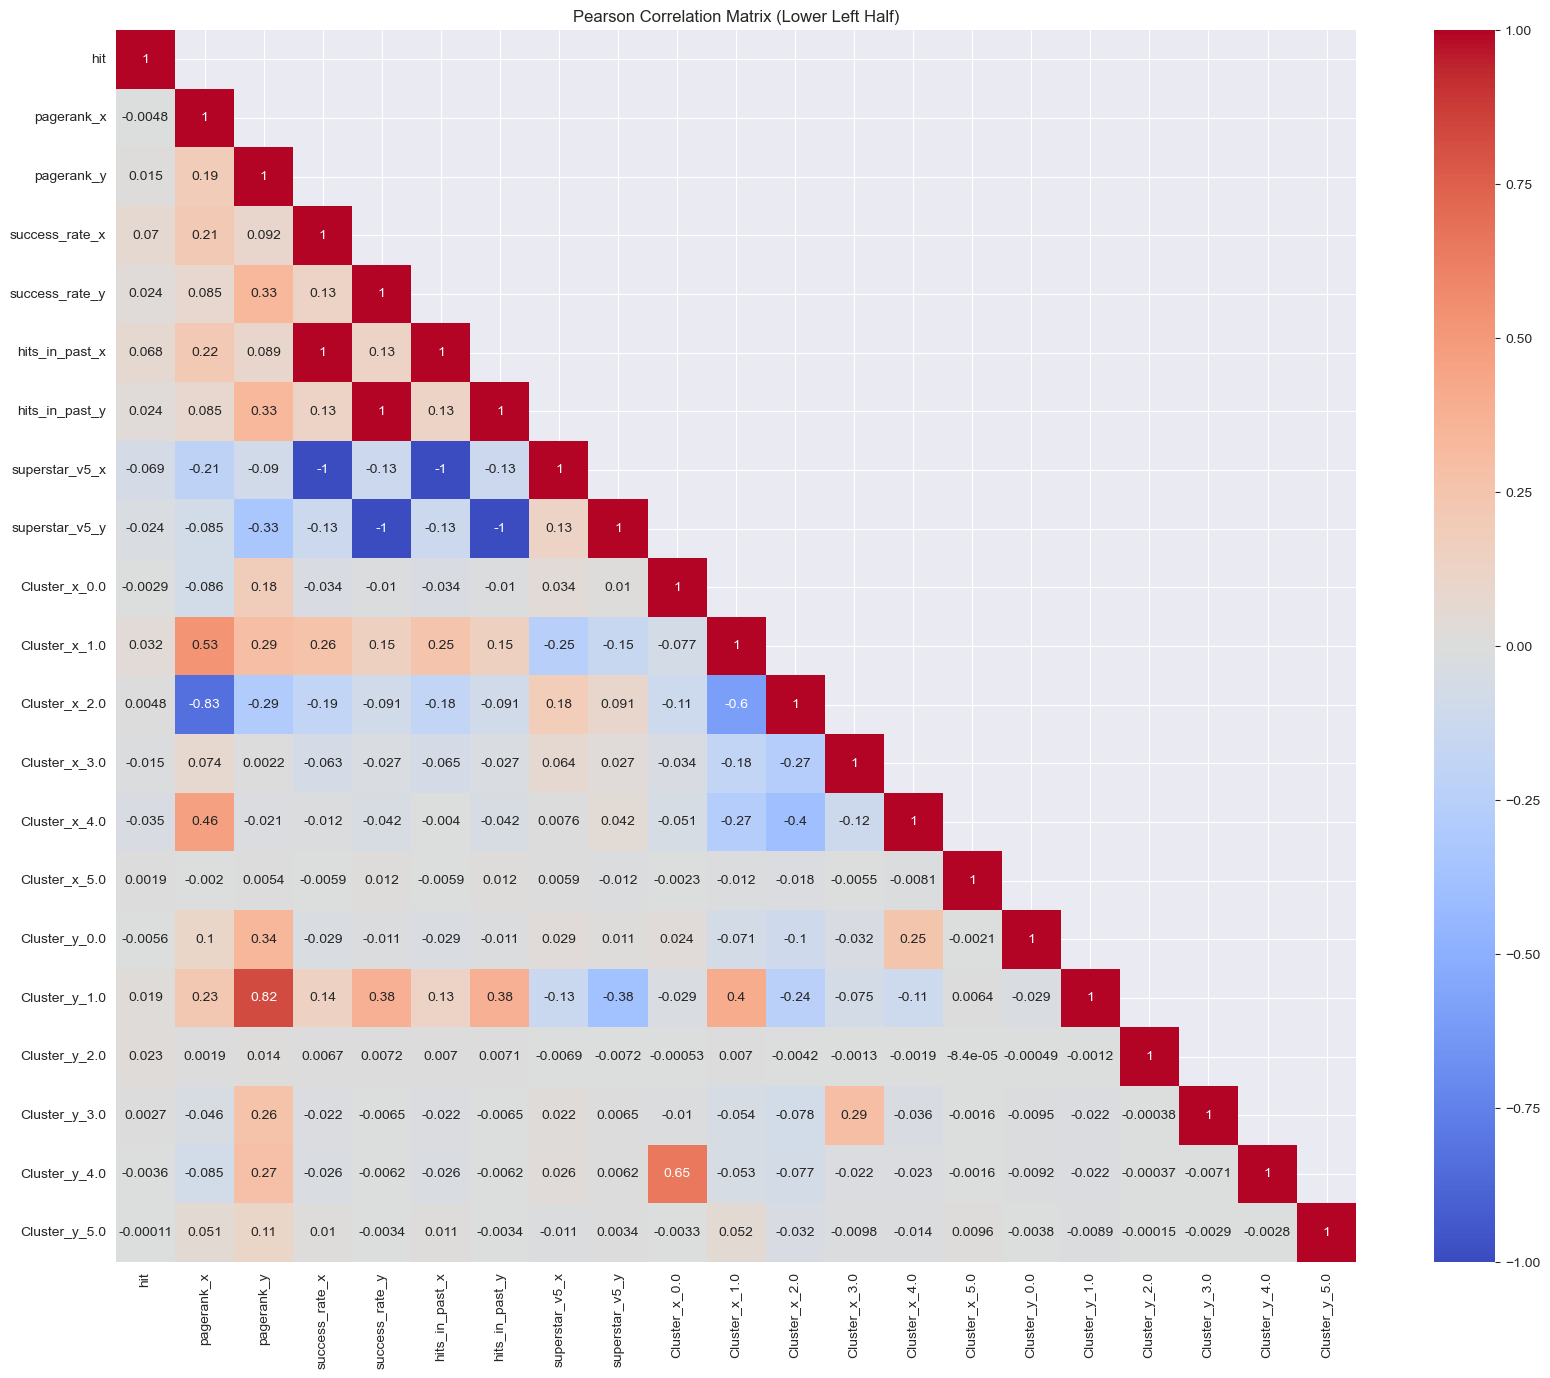

In [197]:
correlation_matrix = df_one_hot[columns].corr(method="spearman")

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
identity_matrix = np.identity(mask.shape[0])
real_mask = mask-identity_matrix
real_mask = real_mask.astype(dtype=bool)

# Plot the correlation matrix with the mask
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, mask=real_mask, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Pearson Correlation Matrix (Lower Left Half)')
plt.show()

plot amount hit songs and successrate of artist by clusters and pagerank as well as superstar var.

## explain on Example of Taylor swift

In [198]:
swift_id = '06HL4z0CvFAxyc27GXpf02'

In [199]:
swift_songs = data_train[(data_train["artist1_id"] == swift_id) | (data_train["artist2_id"] == swift_id)]
swift_songs

,song_id,song_name,song_popularity,explicit,song_type,track_number,num_artists,num_available_markets,release_date,duration_ms,...,superstar_v5_y,success_rate_x,success_rate_y,hits_in_past_x,hits_in_past_y,superstar_x,superstar_y,artist1_num,artist2_num,date
11455,0RFCHlNuTeUHIB36VuVbOL,"Sweeter Than Fiction - From ""One Chance"" Sound...",43.0,False,Solo,1.0,1.0,79.0,2013-10-21,237640.0,...,1.000000,0.141463,0.000000,29,0,1,0,7214.0,0.0,2013-10-21
29292,2KrOAg6FftbjgSKdd2a4rS,You Are In Love,54.0,False,Solo,15.0,1.0,76.0,2014-01-01,267107.0,...,1.000000,0.198113,0.000000,21,0,1,0,7214.0,0.0,2014-01-01
29290,6RvRzl1YJTDnUvdOtV21IK,Wonderland,54.0,False,Solo,14.0,1.0,76.0,2014-01-01,245560.0,...,1.000000,0.198113,0.000000,21,0,1,0,7214.0,0.0,2014-01-01
28433,0qUnBLZ8bJqUNEeQgayL9t,Out Of The Woods,62.0,False,Solo,4.0,1.0,76.0,2014-01-01,235800.0,...,1.000000,0.198113,0.000000,21,0,1,0,7214.0,0.0,2014-01-01
28491,3fVnlF4pGqWI9flVENcT28,Wildest Dreams,71.0,False,Solo,9.0,1.0,76.0,2014-01-01,220440.0,...,1.000000,0.198113,0.000000,21,0,1,0,7214.0,0.0,2014-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270223,7FFfYM4JE1vj5n4rhHxg8q,Babe (feat. Taylor Swift),49.0,False,Collaboration,1.0,2.0,79.0,2018-04-20,215107.0,...,0.045321,0.000000,0.117647,0,12,0,1,10756.0,7214.0,2018-04-20
282983,0SoK5u8MD2VVikNPwXBz74,Babe,56.0,False,Collaboration,15.0,2.0,79.0,2018-06-07,215107.0,...,0.046994,0.000000,0.116505,0,12,0,1,10756.0,7214.0,2018-06-07
282977,0L65Q96BYdbLMvXggkqvQc,Babe - Commentary,22.0,False,Collaboration,14.0,2.0,79.0,2018-06-07,330157.0,...,0.046994,0.000000,0.116505,0,12,0,1,10756.0,7214.0,2018-06-07
283906,2Sy2oGjP5RYB4cLVoDU0Gz,Delicate - Seeb Remix,53.0,False,Collaboration,1.0,2.0,79.0,2018-06-08,173266.0,...,1.000000,0.114286,0.000000,12,0,1,0,7214.0,8946.0,2018-06-08


Taylor Swift's is part of Cluster 1 

In [200]:
swift_songs["num_artists"].value_counts()

num_artists
1.0    163
2.0     12
Name: count, dtype: int64

In [201]:
swift_songs["hit"].value_counts()

hit
0.0    168
1.0      7
Name: count, dtype: int64

alan walker

In [202]:
walker_id = '7vk5e3vY1uw9plTHJAMwjN'
walker_songs = data_train[(data_train["artist1_id"] == walker_id) | (data_train["artist2_id"] == walker_id)]
walker_songs

,song_id,song_name,song_popularity,explicit,song_type,track_number,num_artists,num_available_markets,release_date,duration_ms,...,superstar_v5_y,success_rate_x,success_rate_y,hits_in_past_x,hits_in_past_y,superstar_x,superstar_y,artist1_num,artist2_num,date
87404,2lfPecqFbH8X4lHSpTxt8l,Fade,65.0,False,Solo,1.0,1.0,79.0,2014-11-19,264014.0,...,1.000000,0.000000,0.000000,0,0,0,0,7586.0,0.0,2014-11-19
95571,0lMrWcrVXHPEuVBuc0nRzZ,Spectre,64.0,False,Solo,1.0,1.0,79.0,2015-01-06,230635.0,...,1.000000,0.000000,0.000000,0,0,0,0,7586.0,0.0,2015-01-06
109759,4YhITuwINLCfXYB2WCXbCZ,Force,64.0,False,Solo,1.0,1.0,79.0,2015-04-02,240006.0,...,1.000000,0.000000,0.000000,0,0,0,0,7586.0,0.0,2015-04-02
149337,0RLjnX1vYWvtdThB8LABwo,Faded - Piano Version,47.0,False,Solo,4.0,1.0,79.0,2015-12-04,215080.0,...,1.000000,0.000000,0.000000,0,0,0,0,7586.0,0.0,2015-12-04
149338,34F4GJFUzPvPJmGrTpyqlZ,Faded (Restrung),51.0,False,Solo,3.0,1.0,79.0,2015-12-04,217053.0,...,1.000000,0.000000,0.000000,0,0,0,0,7586.0,0.0,2015-12-04
149317,0HmONWWIU1FXkwWLDpqrjl,Faded - Instrumental,54.0,False,Solo,2.0,1.0,79.0,2015-12-04,214013.0,...,1.000000,0.000000,0.000000,0,0,0,0,7586.0,0.0,2015-12-04
172159,1VNbNTzQS0iIVrlaPXUthv,Faded - Luke Christopher Remix,45.0,False,Collaboration,8.0,2.0,79.0,2016-04-29,206387.0,...,1.000000,0.000000,0.000000,0,0,0,0,7586.0,4529.0,2016-04-29
172180,7MDobIiZKLbDDibHDA1fl8,Faded - Tiesto's Northern Lights Remix,53.0,False,Collaboration,7.0,2.0,79.0,2016-04-29,250280.0,...,0.359062,0.000000,0.011111,0,1,0,1,7586.0,14692.0,2016-04-29
172296,1730zLNltAlPSHgvqGFw7r,Faded - Slushii Remix,45.0,False,Collaboration,2.0,2.0,79.0,2016-04-29,211693.0,...,1.000000,0.000000,0.000000,0,0,0,0,7586.0,5963.0,2016-04-29
172285,4oy9qiatxPctH4iUkeq4p0,Faded - Y&V Remix,36.0,False,Collaboration,6.0,2.0,79.0,2016-04-29,273213.0,...,1.000000,0.000000,0.000000,0,0,0,0,7586.0,3522.0,2016-04-29


In [203]:
walker_songs["num_artists"].value_counts()

num_artists
2.0    24
1.0    12
Name: count, dtype: int64

In [204]:
walker_songs["hit"].value_counts()

hit
0.0    36
Name: count, dtype: int64

get one of the most successfull artists:


In [205]:
data_train.sort_values(by="hits_in_past_x", ascending=False)

,song_id,song_name,song_popularity,explicit,song_type,track_number,num_artists,num_available_markets,release_date,duration_ms,...,superstar_v5_y,success_rate_x,success_rate_y,hits_in_past_x,hits_in_past_y,superstar_x,superstar_y,artist1_num,artist2_num,date
7188,3vgj1Usw1HhwHJcNBJHFvz,I Saw Her Standing There (Glee Cast Version),35.0,False,Solo,7.0,1.0,53.0,2013-09-23,160187.0,...,1.0,0.091727,0.0,51,0,1,0,12657.0,0.0,2013-09-23
7229,7BFhoyG78sIEUgIqksAiDm,Got To Get You Into My Life (Glee Cast Version),37.0,False,Solo,3.0,1.0,53.0,2013-09-23,149520.0,...,1.0,0.091727,0.0,51,0,1,0,12657.0,0.0,2013-09-23
7226,3m6ZXbDZ6c7JhKqcUVLI5I,Help (Glee Cast Version),38.0,False,Solo,5.0,1.0,53.0,2013-09-23,138133.0,...,1.0,0.091727,0.0,51,0,1,0,12657.0,0.0,2013-09-23
7240,5w9b5p3hxQ12bUJ5dRPrQ7,Drive My Car (Glee Cast Version),35.0,False,Solo,2.0,1.0,53.0,2013-09-23,152947.0,...,1.0,0.091727,0.0,51,0,1,0,12657.0,0.0,2013-09-23
7254,7oUqrkz1A5D6XIVZUya44D,Here Comes The Sun (Glee Cast Version feat. De...,42.0,False,Solo,10.0,1.0,53.0,2013-09-23,180453.0,...,1.0,0.091727,0.0,51,0,1,0,12657.0,0.0,2013-09-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107385,6uzdATVo4TbxZBBqvHK0v8,Bulls on Parade,9.0,False,Solo,1.0,1.0,79.0,2015-03-16,208475.0,...,1.0,0.000000,0.0,0,0,0,0,5536.0,0.0,2015-03-16
107384,09T6mVuYUjYyElPYf0ERSa,Runaway (U & I) - East & Young Remix,30.0,False,Collaboration,3.0,2.0,71.0,2015-03-16,274268.0,...,1.0,0.000000,0.0,0,0,0,0,10452.0,15321.0,2015-03-16
107382,3Bjic2XPCHChLijmIhgwGu,Over My Shoulder - Live,19.0,False,Solo,13.0,1.0,79.0,2015-03-16,351840.0,...,1.0,0.000000,0.0,0,0,0,0,14048.0,0.0,2015-03-16
107381,6MPpdRExu4crLQ2ngu0E0Y,"I Say a Little Prayer - From ""My Best Friend's...",0.0,False,Solo,12.0,1.0,79.0,2015-03-16,211000.0,...,1.0,0.000000,0.0,0,0,0,0,13243.0,0.0,2015-03-16


since gleecast is not really one artist we chose to use drake instead:

In [206]:
drake_id = '3TVXtAsR1Inumwj472S9r4'
drake_songs = data_train[(data_train["artist1_id"] == drake_id) | (data_train["artist2_id"] == drake_id)]
drake_songs

,song_id,song_name,song_popularity,explicit,song_type,track_number,num_artists,num_available_markets,release_date,duration_ms,...,superstar_v5_y,success_rate_x,success_rate_y,hits_in_past_x,hits_in_past_y,superstar_x,superstar_y,artist1_num,artist2_num,date
3551,4nYZsbdPt2nozYtWtsV9LM,Live For,18.0,False,Collaboration,6.0,2.0,3.0,2013-09-09,229492.205405,...,0.049803,0.006849,0.068571,1,12,1,1,1649.0,9126.0,2013-09-09
8045,4FcvYEVtmB0UuIPbdzwqsH,Cabaret (feat. Drake),44.0,True,Collaboration,3.0,2.0,79.0,2013-09-27,272747.000000,...,0.051394,0.115385,0.068182,3,12,1,1,13171.0,9126.0,2013-09-27
9051,7zC3CmcLczLxUrqZ1fOZ9s,When Joanna Loved Me,11.0,False,Solo,21.0,1.0,79.0,2013-10-04,184507.000000,...,0.044101,0.038835,0.073446,4,13,1,1,319.0,9126.0,2013-10-04
30394,3IiV2S9VD7L6NbUY8t9PkK,Who Do You Love?,20.0,False,Collaboration,10.0,2.0,2.0,2014-01-01,233547.000000,...,0.024425,0.000000,0.090361,0,15,0,1,7828.0,9126.0,2014-01-01
30386,6lVJb47gQEh3PV585qgRoy,Grindin',47.0,True,Collaboration,1.0,2.0,78.0,2014-01-01,306173.000000,...,0.024425,0.000000,0.090361,0,15,0,1,14558.0,9126.0,2014-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289122,2WP8G2pdddDmnh1xbfKBOI,Finesse,66.0,False,Solo,5.0,1.0,79.0,2018-06-29,182080.000000,...,1.000000,0.179245,0.000000,38,0,1,0,9126.0,8685.0,2018-06-29
289114,2G7V7zsVDxg1yRsu7Ew9RJ,In My Feelings,82.0,True,Solo,9.0,1.0,79.0,2018-06-29,217925.000000,...,1.000000,0.179245,0.000000,38,0,1,0,9126.0,0.0,2018-06-29
289228,44Du2IM1bGY7dicmLfXbUs,Final Fantasy,63.0,True,Solo,12.0,1.0,79.0,2018-06-29,219960.000000,...,1.000000,0.179245,0.000000,38,0,1,0,9126.0,15822.0,2018-06-29
289208,09lmraDvzBT3pUQ2rUtJzK,March 14,60.0,True,Solo,13.0,1.0,79.0,2018-06-29,309560.000000,...,1.000000,0.179245,0.000000,38,0,1,0,9126.0,5570.0,2018-06-29


In [207]:
drake_songs["num_artists"].value_counts()

num_artists
1.0    158
2.0    135
Name: count, dtype: int64

almost half of the songs were collaborations

In [208]:
drake_songs["hit"].value_counts()

hit
0.0    259
1.0     34
Name: count, dtype: int64

In [209]:
drake_hits = drake_songs[drake_songs["hit"] == 1.0]
drake_hits

,song_id,song_name,song_popularity,explicit,song_type,track_number,num_artists,num_available_markets,release_date,duration_ms,...,superstar_v5_y,success_rate_x,success_rate_y,hits_in_past_x,hits_in_past_y,superstar_x,superstar_y,artist1_num,artist2_num,date
9051,7zC3CmcLczLxUrqZ1fOZ9s,When Joanna Loved Me,11.0,False,Solo,21.0,1.0,79.0,2013-10-04,184507.0,...,0.044101,0.038835,0.073446,4,13,1,1,319.0,9126.0,2013-10-04
72398,74uz46QT7uJOL9UMy4QNOj,It Ain't No Use,1.0,False,Solo,19.0,1.0,78.0,2014-08-15,166827.0,...,0.079788,0.075145,0.027972,13,4,1,1,9126.0,319.0,2014-08-15
72399,6frqShk9fhsOzoKPYXKzk9,Girls,1.0,False,Solo,3.0,1.0,78.0,2014-08-15,127000.0,...,0.079788,0.075145,0.027972,13,4,1,1,9126.0,319.0,2014-08-15
102985,12d5QFwzh60IIHlsSnAvps,10 Bands,64.0,True,Solo,3.0,1.0,79.0,2015-02-12,177733.0,...,1.000000,0.070423,0.000000,10,0,1,0,9126.0,0.0,2015-02-12
102991,79XrkTOfV1AqySNjVlygpW,Energy,69.0,True,Solo,2.0,1.0,79.0,2015-02-12,181933.0,...,1.000000,0.070423,0.000000,10,0,1,0,9126.0,0.0,2015-02-12
102989,2durxb17bXcmQJHSt8JAdO,No Tellin',60.0,True,Solo,5.0,1.0,79.0,2015-02-12,310933.0,...,1.000000,0.070423,0.000000,10,0,1,0,9126.0,0.0,2015-02-12
102987,5InOp6q2vvx0fShv3bzFLZ,Know Yourself,65.0,True,Solo,4.0,1.0,79.0,2015-02-12,275840.0,...,1.000000,0.070423,0.000000,10,0,1,0,9126.0,13652.0,2015-02-12
102986,3a8tAZFJxlmBwOtrf5L1oC,6 God,61.0,True,Solo,7.0,1.0,79.0,2015-02-12,180667.0,...,1.000000,0.070423,0.000000,10,0,1,0,9126.0,0.0,2015-02-12
102984,1ID1QFSNNxi0hiZCNcwjUC,Legend,68.0,True,Solo,1.0,1.0,79.0,2015-02-12,241853.0,...,1.000000,0.070423,0.000000,10,0,1,0,9126.0,0.0,2015-02-12
102983,4kdfjhj9xNkYU0R8xlDy8k,6 Man,59.0,True,Solo,12.0,1.0,79.0,2015-02-12,167653.0,...,1.000000,0.070423,0.000000,10,0,1,0,9126.0,0.0,2015-02-12


In [212]:
drake_hits["num_artists"].value_counts()

num_artists
1.0    34
Name: count, dtype: int64

of these x songs y are collabs

In [213]:
drake_collab = drake_songs[drake_songs["num_artists"] >= 2.0]
drake_collab

,song_id,song_name,song_popularity,explicit,song_type,track_number,num_artists,num_available_markets,release_date,duration_ms,...,superstar_v5_y,success_rate_x,success_rate_y,hits_in_past_x,hits_in_past_y,superstar_x,superstar_y,artist1_num,artist2_num,date
3551,4nYZsbdPt2nozYtWtsV9LM,Live For,18.0,False,Collaboration,6.0,2.0,3.0,2013-09-09,229492.205405,...,0.049803,0.006849,0.068571,1,12,1,1,1649.0,9126.0,2013-09-09
8045,4FcvYEVtmB0UuIPbdzwqsH,Cabaret (feat. Drake),44.0,True,Collaboration,3.0,2.0,79.0,2013-09-27,272747.000000,...,0.051394,0.115385,0.068182,3,12,1,1,13171.0,9126.0,2013-09-27
30394,3IiV2S9VD7L6NbUY8t9PkK,Who Do You Love?,20.0,False,Collaboration,10.0,2.0,2.0,2014-01-01,233547.000000,...,0.024425,0.000000,0.090361,0,15,0,1,7828.0,9126.0,2014-01-01
30386,6lVJb47gQEh3PV585qgRoy,Grindin',47.0,True,Collaboration,1.0,2.0,78.0,2014-01-01,306173.000000,...,0.024425,0.000000,0.090361,0,15,0,1,14558.0,9126.0,2014-01-01
30383,73MbqeKfMZ5KJfNmVn6ysI,Grindin',17.0,False,Collaboration,1.0,2.0,14.0,2014-01-01,306187.000000,...,0.024425,0.037037,0.090361,8,15,1,1,5769.0,9126.0,2014-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278338,6vN77lE9LK6HP2DewaN6HZ,Yes Indeed,78.0,True,Collaboration,5.0,2.0,79.0,2018-05-18,142273.000000,...,0.011420,0.014706,0.200000,1,38,1,1,14150.0,9126.0,2018-05-18
289961,7F2Asc2ygbpVSurTCOP8Po,Don’t Matter To Me (with Michael Jackson),32.0,False,Collaboration,10.0,2.0,24.0,2018-06-29,245787.000000,...,0.853445,0.179245,0.071429,38,1,1,1,9126.0,4400.0,2018-06-29
289944,4BmsVfixi6ndJ0pNZlE75D,Talk Up (feat. Jay-Z),28.0,False,Collaboration,11.0,2.0,24.0,2018-06-29,223240.000000,...,1.000000,0.179245,0.000000,38,0,1,0,9126.0,12369.0,2018-06-29
289819,4ksuI04WMvUnJbHQjgs3L5,Talk Up (feat. Jay-Z),63.0,True,Collaboration,11.0,2.0,79.0,2018-06-29,223240.000000,...,1.000000,0.179245,0.000000,38,0,1,0,9126.0,12369.0,2018-06-29


In [214]:
drake_collab["hit"].value_counts()

hit
0.0    135
Name: count, dtype: int64

% of hit songs are collab..